# Python Tips and Tricks

<div align='center'><img src='https://raw.githubusercontent.com/eitanlees/ISC-3313/master/images/boa.gif'/></div>

So far we have covered the basics of the python programming language. 

In todays class I want to cover some more advanced features of the language as well as some constructs you might see out in the "wild"

## ``*args`` and ``**kwargs``: Flexible Arguments
Sometimes you might wish to write a function in which you don't initially know how many arguments the user will pass.

In this case, you can use the special form ``*args`` and ``**kwargs`` to catch all arguments that are passed.

Here is an example:

In [1]:
def catch_all(*args, **kwargs):
    print("args =", args)
    print("kwargs = ", kwargs)

In [2]:
catch_all(1, 2, 3, a=4, b=5)

args = (1, 2, 3)
kwargs =  {'a': 4, 'b': 5}


In [3]:
catch_all('a', keyword=2)

args = ('a',)
kwargs =  {'keyword': 2}


Here it is not the names ``args`` and ``kwargs`` that are important, but the ``*`` characters preceding them.

``args`` and ``kwargs`` are just the variable names often used by convention, short for "arguments" and "keyword arguments".

The operative difference is the asterisk characters: a single ``*`` before a variable means "expand this as a sequence", while a double ``**`` before a variable means "expand this as a dictionary".

In fact, this syntax can be used not only with the function definition, but with the function call as well!

In [4]:
inputs = (1, 2, 3)
keywords = {'pi': 3.14}

catch_all(*inputs, **keywords)

args = (1, 2, 3)
kwargs =  {'pi': 3.14}


## Exercise

Create a function called `greetings` which takes two parameters, `message` and the `*args` parameter. The function should print out a greeting for each person. 

    >>> greetings('Hello', 'Eitan', 'Lauren', 'Anna')
    Hello Eitan
    Hello Lauren
    Hello Anna

Print out a greeting for `'Abby', 'Brian', and 'Chelsea'`.

## Exercise

Modify the `fancy_plot` function to take a `**kwargs` (keyword arguments) parameter which is passed to the plot command to configure the plot.

Try calling the function with added keywords to configure the plot. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def fancy_plot(x, y):
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set(ylim=(-2, 2), title = 'My Fancy Plot')

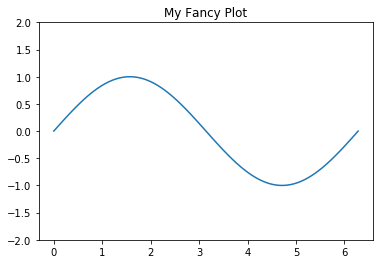

In [6]:
x = np.linspace(0, 2*np.pi, 100)
fancy_plot(x, np.sin(x))

# List Comprehensions

If you read enough Python code, you'll eventually come across the terse and efficient construction known as a *list comprehension*.

It looks something like this:

In [7]:
[i for i in range(20) if i % 3 > 0]

[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19]

While this example may seem a bit confusing at first, as familiarity with Python grows, reading and writing list comprehensions will become second nature.

## Basic List Comprehensions

List comprehensions are simply a way to compress a list-building for-loop into a single short, readable line.

For example, here is a loop that constructs a list of the first 12 square integers:

In [8]:
L = []
for n in range(12):
    L.append(n ** 2)
L

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121]

The list comprehension equivalent of this is the following:

In [9]:
[n ** 2 for n in range(12)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121]

As with many Python statements, you can almost read-off the meaning of this statement in plain English: "construct a list consisting of the square of ``n`` for each ``n`` up to 12".

This basic syntax, then, is ``[``*``expr``* ``for`` *``var``* ``in`` *``iterable``*``]``, where *``expr``* is any valid expression, *``var``* is a variable name, and *``iterable``* is any iterable Python object.

## Multiple Iteration
Sometimes you want to build a list not just from one value, but from two. 

To do this, simply add another ``for`` expression in the comprehension:

In [10]:
[(i, j) for i in range(2) for j in range(3)]

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

Notice that the second ``for`` expression acts as the interior index, varying the fastest in the resulting list.

In [11]:
[(i, j) for i in range(2) for j in range(3)]

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

In [12]:
L = []
for i in range(2):
    for j in range(3):
        L.append((i, j))
print(L)

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]


## Exercise

Modify the code below to use list comprehension instead of a `for` loop

In [13]:
guests = ["Kirk", "Spock", "Bones", "Scotty", "Uhura", "Sulu", "Chekov"]

L = []
for person in guests:
    L.append(person.lower())
print(L)

['kirk', 'spock', 'bones', 'scotty', 'uhura', 'sulu', 'chekov']


## Exercise

Create a list of all possible pairs of DNA snippets below using list comprehension. 

In [14]:
Codon_A = ["CTA", "TGC", "GGC", "GGA"]
Codon_B = ["GAT", "TCG", "AGT", "AGC"]

## Conditionals on the Iterator

You can further control the iteration by adding a conditional to the end of the expression.

In the first example of the section, we iterated over all numbers from 1 to 20, but left-out multiples of 3.

Look at this again, and notice the construction:

In [15]:
[val for val in range(20) if val % 3 > 0]

[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19]

The expression ``(i % 3 > 0)`` evaluates to ``True`` unless ``val`` is divisible by 3.

Again, the English language meaning can be immediately read off: "Construct a list of values for each value up to 20, but only if the value is not divisible by 3".

Once you are comfortable with it, this is much easier to write – and to understand at a glance – than the equivalent loop syntax:

In [16]:
L = []
for val in range(20):
    if val % 3:
        L.append(val)
L

[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19]

## Conditionals on the Value
If you've programmed in C, you might be familiar with the single-line conditional enabled by the ``?`` operator:
``` C
int absval = (val < 0) ? -val : val
```
Python has something very similar to this, which is most often used within list comprehensions, ``lambda`` functions, and other places where a simple expression is desired:

In [17]:
val = -10
val if val >= 0 else -val

10

We see that this simply duplicates the functionality of the built-in ``abs()`` function, but the construction lets you do some really interesting things within list comprehensions.

This is getting pretty complicated now, but you could do something like this:

In [18]:
[val if val % 2 else -val
 for val in range(20) if val % 3]  

[1, -2, -4, 5, 7, -8, -10, 11, 13, -14, -16, 17, 19]

Note the line break within the list comprehension before the ``for`` expression: this is valid in Python, and is often a nice way to break-up long list comprehensions for greater readibility.

Look this over: what we're doing is constructing a list, leaving out multiples of 3, and negating all mutliples of 2.

## Useful Iterators

Here we'll cover some of the more useful iterators in the Python language:

### ``enumerate``
Often you need to iterate not only the values in an array, but also keep track of the index.
You might be tempted to do things this way:

In [19]:
L = [2, 4, 6, 8, 10]
for i in range(len(L)):
    print(i, L[i])

0 2
1 4
2 6
3 8
4 10


Although this does work, Python provides a cleaner syntax using the ``enumerate`` iterator:

In [20]:
for i, val in enumerate(L):
    print(i, val)

0 2
1 4
2 6
3 8
4 10


This is the more "Pythonic" way to enumerate the indices and values in a list.

### ``zip``

Other times, you may have multiple lists that you want to iterate over simultaneously.

You could certainly iterate over the index as in the non-Pythonic example we looked at previously, but it is better to use the ``zip`` iterator, which zips together iterables:

In [21]:
L = [2, 4, 6, 8, 10]
R = [3, 6, 9, 12, 15]
for p in zip(L, R):
    print(p)

(2, 3)
(4, 6)
(6, 9)
(8, 12)
(10, 15)


Any number of iterables can be zipped together, and if they are different lengths, the shortest will determine the length of the ``zip``.

## Exercise

Use `enumerate` and `zip` to print out a list of students and their associated scores on an exam. For examples

    1. Brian: 82
    2. Sarah: 95
    3. George: 89
    4. Kate: 100
    etc...

In [22]:
students = ["Emily", "Jacob", "Emma", "Madison", "Matthew", "Hailey", "Nicholas", "Sarah", "Joshua"]
grades = [81, 81, 92, 79, 79, 82, 99, 94, 87]

### ``map`` and ``filter``
The ``map`` iterator takes a function and applies it to the values in an iterator:

In [23]:
# find the first 10 square numbers
square = lambda x: x ** 2
for val in map(square, range(10)):
    print(val)

0
1
4
9
16
25
36
49
64
81


The ``filter`` iterator looks similar, except it only passes-through values for which the filter function evaluates to True:

In [24]:
# find values up to 10 for which x % 2 is zero
is_even = lambda x: x % 2 == 0
for val in filter(is_even, range(10)):
    print(val)

0
2
4
6
8


## Exercise

In lecture 7 we made a function to test if a word was a palindrome or not. Use this function along with `filter` to pick out the palindromes from a list of words.

In [25]:
list_of_strings = [
    "alarm",
    "apple", 
    "bashful",
    "civic",
    "ear"
    "fuzzy",
    "hobbies",
    "kayak",
    "level",
    "racecar",
    "save",
    "stats",
    "tasteful"
]

### Iterators as function arguments

We saw in [``*args`` and ``**kwargs``: Flexible Arguments](#*args-and-**kwargs:-Flexible-Arguments). that ``*args`` and ``**kwargs`` can be used to pass sequences and dictionaries to functions.

It turns out that the ``*args`` syntax works not just with sequences, but with any iterator:

In [26]:
print(*range(10))

0 1 2 3 4 5 6 7 8 9


So, for example, we can get tricky and compress the ``map`` example from before into the following:

In [27]:
print(*map(lambda x: x ** 2, range(10)))

0 1 4 9 16 25 36 49 64 81


Using this trick lets us answer the age-old question that comes up in Python learners' forums: why is there no ``unzip()`` function which does the opposite of ``zip()``?

If you lock yourself in a dark closet and think about it for a while, you might realize that the opposite of ``zip()`` is... ``zip()``! The key is that ``zip()`` can zip-together any number of iterators or sequences. 

Observe:

In [28]:
L1 = (1, 2, 3, 4)
L2 = ('a', 'b', 'c', 'd')

In [29]:
z = zip(L1, L2)
print(*z)

(1, 'a') (2, 'b') (3, 'c') (4, 'd')


In [30]:
z = zip(L1, L2)
new_L1, new_L2 = zip(*z)
print(new_L1, new_L2)

(1, 2, 3, 4) ('a', 'b', 'c', 'd')


Ponder this for a while. If you understand why it works, you'll have come a long way in understanding Python iterators!

## Specialized Iterators: ``itertools``

The ``itertools`` module contains a whole host of useful iterators; it's well worth your while to explore the module to see what's available.

As an example, consider the ``itertools.permutations`` function, which iterates over all permutations of a sequence:

In [31]:
from itertools import permutations
p = permutations(range(3))
print(*p)

(0, 1, 2) (0, 2, 1) (1, 0, 2) (1, 2, 0) (2, 0, 1) (2, 1, 0)


Similarly, the ``itertools.combinations`` function iterates over all unique combinations of ``N`` values within a list:

In [32]:
from itertools import combinations
c = combinations(range(4), 2)
print(*c)

(0, 1) (0, 2) (0, 3) (1, 2) (1, 3) (2, 3)


Somewhat related is the ``product`` iterator, which iterates over all sets of pairs between two or more iterables:

In [33]:
from itertools import product
p = product('ab', range(3))
print(*p)

('a', 0) ('a', 1) ('a', 2) ('b', 0) ('b', 1) ('b', 2)


Many more useful iterators exist in ``itertools``: the full list can be found, along with some examples, in Python's [online documentation](https://docs.python.org/3.5/library/itertools.html).